Problem Statement - Build your own recommendation system for products on an e-commerce website like Amazon.com. Dataset Link - https://drive.google.com/file/d/1ClBptsK3V5KgKXtK2GSRzFNAW7GnTPDW/view?usp=sharing 
 
Dataset columns​ - first three columns are userId, productId, and ratings and the fourth column is timestamp. You can discard the timestamp column as in this case you may not need to use it. Source​ - Amazon Reviews data (http://jmcauley.ucsd.edu/data/amazon/)  The repository has several datasets. For this case study, we are using the Electronics dataset. 
 
Please do the analysis based on steps( 1 to 8) as given below -  Steps - 1. Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics) 2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings ) 3. Build Popularity Recommender model. 4. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio) 5. Build Collaborative Filtering model. 6. Evaluate the above model. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models. 7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products. 8. Summarise your insights. 
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from sklearn.model_selection import train_test_split
from surprise import Dataset, Reader, KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split

In [2]:
##Popularity based systems :- It works by recommeding items viewed and purchased by most people and are rated high.
##It is not a personalized recommendation.

In [3]:
electronic_df=pd.read_csv("ratings_Electronics.csv",names=['userID','productID','Rating','timestamp'])

## columns re-named / headers added and plots created at different stages in the project

In [4]:
## display the data

electronic_df.head()

,userID,productID,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [5]:
# Attribute Information:
# ● userId : Every user identified with a unique id
# ● productId : Every product identified with a unique id
# ● Rating : Rating of the corresponding product by the corresponding user
# ● timestamp : Time of the rating ( ignore this column for this exercise)

In [6]:
#Shape of the data

electronic_df.shape

(7824482, 4)

In [7]:
#Taking subset of the dataset

electronic_df=electronic_df.iloc[:1048576,0:]

In [8]:
electronic_df.info()

#Check the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 4 columns):
userID       1048576 non-null object
productID    1048576 non-null object
Rating       1048576 non-null float64
timestamp    1048576 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 32.0+ MB


In [9]:
electronic_df.dtypes

#Check the datatypes
## rating and time stamp are float and integer type, while userID and productID are object datatypes

userID        object
productID     object
Rating       float64
timestamp      int64
dtype: object

In [10]:
electronic_df.describe()['Rating'].T

## reading the details about rating variable to have an understanding of the spread across this parameter
# Five point summary with respect to the rating column 

count    1.048576e+06
mean     3.973380e+00
std      1.399329e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [11]:
#Check for missing values
## There are nil missing values in the dataset

electronic_df.isnull().sum()

userID       0
productID    0
Rating       0
timestamp    0
dtype: int64

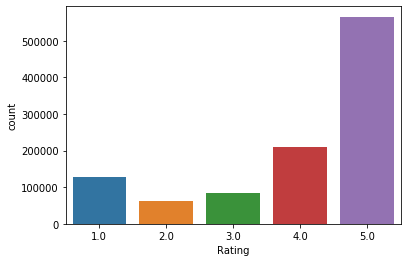

In [12]:
# Checking the distribution of the rating via plots. Maximum rating count is 5 given by people to the products on amazon

sns.countplot(electronic_df['Rating'])

In [13]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",electronic_df.shape[0])
print("Total No of Users   :", len(np.unique(electronic_df.userID)))
print("Total No of products  :", len(np.unique(electronic_df.productID)))

Total data 
--------------------------------------------------

Total no of ratings : 1048576
Total No of Users   : 786330
Total No of products  : 61894


In [14]:
#Dropping the Timestamp column
electronic_df=electronic_df.drop(['timestamp'],axis=1)

In [15]:
electronic_df.head()

,userID,productID,Rating
0,AKM1MP6P0OYPR,0132793040,5.0
1,A2CX7LUOHB2NDG,0321732944,5.0
2,A2NWSAGRHCP8N5,0439886341,1.0
3,A2WNBOD3WNDNKT,0439886341,3.0
4,A1GI0U4ZRJA8WN,0439886341,1.0


In [16]:
## analyzing the ratings given by the user

electronic_df.groupby('userID')['Rating'].count().sort_values(ascending=False).head()

userID
A5JLAU2ARJ0BO     412
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      146
AT6CZDCP4TRGA     128
Name: Rating, dtype: int64

In [17]:
## creating a dataset which contains users who have given ratings of more than 50

newelectronic_df=electronic_df.groupby("productID").filter(lambda x:x['Rating'].count() >=50)

In [18]:
newelectronic_df.head()

,userID,productID,Rating
183,A1BKC6B7YHYTVV,0972683275,4.0
184,AWVFSIB42LHKJ,0972683275,4.0
185,A36MQBNADRH8YY,0972683275,5.0
186,A3SRXMPLAEZ6DP,0972683275,4.0
187,A20XXTXWF2TCPY,0972683275,5.0


In [22]:
newelectronic_df.shape

(677947, 3)

In [23]:
## total ratings of the product 

newelectronic_df.groupby(by='productID')['Rating'].count().sort_values(ascending=False)

productID
B0002L5R78    9487
B0001FTVEK    5345
B000I68BD4    4903
B000BQ7GW8    4275
B00007E7JU    3523
B000BKJZ9Q    3219
B000B9RI14    2996
B000A6PPOK    2828
B00007M1TZ    2608
B00004ZCJE    2547
B000CSWCQA    2441
B000652M6Y    2152
B00020S7XK    2140
B0007MXZB2    2080
B00001P4ZH    2075
B00093IIRA    2014
B00009R6TA    1978
B000BTL0OA    1965
B00007E7C8    1962
B000CKVOOY    1873
B00007KDVI    1816
B000ID7QNI    1803
B0007XJSQC    1789
B000EPLP3C    1780
B000C1Z0HA    1770
B000HPV3RW    1770
B00007EDZG    1735
B000FBK3QK    1728
B000065BP9    1714
B00004T8R2    1692
              ... 
B000C4ATGY      50
B000A8JYB8      50
B0002HRBSU      50
B000A6JTHO      50
B00007EDYY      50
B0002AFU4E      50
B00000JPPI      50
B000FOI2TW      50
B00005ALB1      50
B00005A3MB      50
B000CSVZTU      50
B0000UYTPC      50
B00005M1UY      50
B00095M5EA      50
B0000659A7      50
B000095S9H      50
B00008IHP3      50
B0000CG4DI      50
B0001WN0M2      50
B000AYKUTW      50
B00008J639      50
B0

In [24]:
newelectronic_df.groupby(by='productID')['Rating'].mean().sort_values(ascending=False)

productID
B0000DYV9H    4.947368
B000053HC5    4.945783
B00009R96C    4.885714
B00005LE76    4.879310
B000I1X3W8    4.869565
B0002E52S4    4.861111
B000213ZFE    4.860000
B00006I53W    4.859551
B00005UKBD    4.858974
B0000TU7I6    4.855263
B00069SORG    4.847458
B00080CM30    4.842697
B000053HH5    4.841499
B00004TDLD    4.840517
B00006I53X    4.839080
B0001PFQAI    4.827586
B00004TENT    4.823529
B000G1ENQA    4.820000
B0000WKYU4    4.819672
B0001F347K    4.818182
B0000XMSNO    4.818182
B00013J86I    4.816667
B0007WK8KS    4.815920
B00005LE77    4.815385
B00009L1UX    4.815385
B0002IP2TY    4.814516
B000FYZARY    4.810811
B00004Y2MM    4.808824
B000HVRQQ8    4.807018
B000EW9Y4M    4.804688
                ...   
B00008SJX3    2.191176
B0002UB2PU    2.161765
B000BI95W0    2.149254
B0001EZKUK    2.104478
B0000AR8Z1    2.066667
B00062FL42    2.054545
B00004RFB8    2.048387
B000FGI970    2.037838
B000067RIV    2.010989
B00007DN1E    2.000000
B00006HYMK    1.982143
B0001NE53Y    1.981818
B

In [25]:
## average rating of the product

newelectronic_df.groupby(by='productID')['Rating'].mean().head()

productID
0972683275    4.470980
1400501466    3.560000
1400501520    4.243902
1400501776    3.884892
1400532620    3.684211
Name: Rating, dtype: float64

In [26]:
ratings_mean_count=pd.DataFrame(newelectronic_df.groupby('productID')['Rating'].mean())

In [27]:
ratings_mean_count['rating_counts']=pd.DataFrame(newelectronic_df.groupby('productID')['Rating'].count())

In [28]:
ratings_mean_count.head()  

,Rating,rating_counts
productID,,
0972683275,4.470980,1051
1400501466,3.560000,250
1400501520,4.243902,82
1400501776,3.884892,139
1400532620,3.684211,171


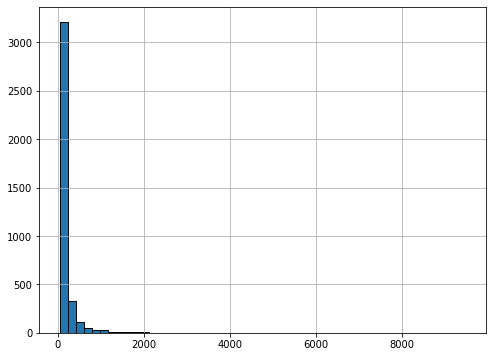

In [29]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

In [30]:
popular_df=pd.DataFrame(newelectronic_df.groupby('productID')['Rating'].count())

In [31]:
popular_df.head()

,Rating
productID,
0972683275,1051
1400501466,250
1400501520,82
1400501776,139
1400532620,171


In [32]:
mostpopular_df=popular_df.sort_values('Rating',ascending=False)

In [33]:
mostpopular_df.head()

,Rating
productID,
B0002L5R78,9487
B0001FTVEK,5345
B000I68BD4,4903
B000BQ7GW8,4275
B00007E7JU,3523


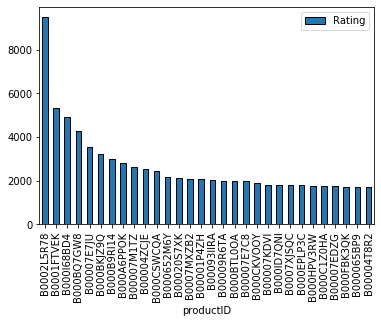

In [34]:
mostpopular_df.head(30).plot(kind = "bar")

In [35]:
#from surprise import KNNWithMeans

In [36]:
#Taking subset of the dataset
#cf_electronic_df=newelectronic_df.iloc[:100000,0:]

In [37]:
## Collaborative filtering is commonly used for recommender systems. CF is based on the idea that the best recommendations
## come from people who have similar tastes. 

In [38]:
#Split the data randomnly into train and test datasets into 70:30 ratio
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(newelectronic_df, reader)
train_data, test_data = train_test_split(data, test_size = 0.3, random_state=7)

In [39]:
train_data

In [40]:
test_data

[('A1H4P50KI3ZR78', 'B00001W0DD', 3.0),
 ('A12N38MGQQ24IU', 'B000CC6I5W', 4.0),
 ('A3CC3NYU9AZLZN', 'B00080G0BK', 5.0),
 ('A34895BBYDUOG7', '0972683275', 5.0),
 ('A3KZLYNISGP6G3', 'B000G1D8HU', 1.0),
 ('AFA34GU7STEIP', 'B000FKP7TY', 1.0),
 ('A3PMLLEYRGU0B7', 'B000092TT0', 5.0),
 ('A1QSD2L5YED1ZZ', 'B0000665P5', 5.0),
 ('AYF0DW19UL1ET', 'B00028ONIA', 5.0),
 ('A1S5H0NNV0C1WE', 'B0000BZL1P', 4.0),
 ('A1CGY8WPQU7T5W', 'B0002A6YVC', 5.0),
 ('A3JSNA3NS7PR0Z', 'B000BFNT0W', 5.0),
 ('A2COSX27R4PU3R', 'B0002LEMWE', 5.0),
 ('A3PABQDYNRCUFK', 'B000ETVKHE', 5.0),
 ('A2OLCQIHJQVPFP', 'B000CSBZLI', 2.0),
 ('A3GXD7RZLS8USP', 'B0002Z82XA', 5.0),
 ('A18EXFJV4KRQF9', 'B0007Y794O', 4.0),
 ('A2RJERZFNFYWMS', 'B0002WPSBC', 5.0),
 ('A14YOHYF49OL6G', 'B000BHQCP4', 5.0),
 ('A2RMGGCF6QY8KS', 'B000FKP7TY', 5.0),
 ('AKTMW6ZJY3CVN', 'B000F78582', 5.0),
 ('A1LCUJZT6L1VLJ', 'B000ETVKHE', 5.0),
 ('A38X4GWATL91EC', 'B000I68BD4', 5.0),
 ('A2YCVO8WSIFFCX', 'B000EBPJCO', 5.0),
 ('A3JLUO2OT9ZP8J', 'B00006SNZN', 5.0),
 ('

In [41]:
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(train_data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [42]:
# run the trained model against the testset
test_pred = algo.test(test_data)

In [43]:
test_pred

[Prediction(uid='A1H4P50KI3ZR78', iid='B00001W0DD', r_ui=3.0, est=3.7704918032786887, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A12N38MGQQ24IU', iid='B000CC6I5W', r_ui=4.0, est=4.048929328517665, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3CC3NYU9AZLZN', iid='B00080G0BK', r_ui=5.0, est=4.658878504672897, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A34895BBYDUOG7', iid='0972683275', r_ui=5.0, est=4.048929328517665, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3KZLYNISGP6G3', iid='B000G1D8HU', r_ui=1.0, est=4.048929328517665, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='AFA34GU7STEIP', iid='B000FKP7TY', r_ui=1.0, est=4.048929328517665, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid='A3PMLLEYRGU0B7', iid='B000092TT0', r_ui=5.0, est=4.048929328517665,

In [44]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 1.3406


1.3405659904409684

In [45]:
## we could use existing user-item interactions to train a model to predict the top-5 items that a user might like the most

In [46]:
cf_electronic_df=newelectronic_df.head(10000)
ratings_df = cf_electronic_df.pivot_table(values='Rating', index='userID', columns='productID', fill_value=0)
ratings_df.head().T

## since the matrix is sparse , unknown values are filled with 0

userID,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O
productID,,,,,
0972683275,0,0,5,4,0
1400501466,0,0,0,0,0
1400501520,0,0,0,0,0
1400501776,0,0,0,0,0
1400532620,0,0,0,0,0
1400532655,0,0,0,0,0
140053271X,0,0,0,0,0
1400532736,0,0,0,0,0
1400599997,0,0,0,0,0


In [47]:
ratings_df.shape

(9832, 76)

In [48]:
## transposing the matrix 

newratings_df=ratings_df.T
newratings_df.head()

userID,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8,AZZST8OYL5P4Q
productID,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
newratings_df.shape

(76, 9832)

In [50]:
#Decomposing the Matrix

from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(newratings_df)
decomposed_matrix.shape

(76, 10)

In [51]:
## preparing a correlation matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(76, 76)

In [52]:
# index of product ID purchased by customer

newratings_df.index[75]


'B00000K135'

In [53]:

## Correlation for all items with the item purchased by this customer based on items rated by other customers who bought
## the same product

i = "B00000K135"

product_names = list(newratings_df.index)
product_ID = product_names.index(i)
product_ID

75

In [54]:
## correlation matrx

## Correlation for all items with the item purchased by this customer based on items rated by other customers who bought
## the same product

correlation_productID = correlation_matrix[product_ID]
correlation_productID.shape

(76,)

In [55]:
## Recommending top 5 highly correlated products in sequence

Recommend = list(newratings_df.index[correlation_productID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:5]

['1400501466', '1400501520', '1400501776', '9575871979', 'B00000J0D8']

In [188]:
## Popularity-based recommender system is a non-personalised recommender system and these are based on frequecy counts
## which may be not suitable to the user when it comes to customised recommendations. It works by recommending items purchased
## most by people and rated high

## Collaborative Filtering based model will recommended and more personalised recommendations 
## based on user's past behavior. It is personalised recommender system and will be a better option to be used in 
## comparison to popularity based recommeder system . Collaborative filtering assumes that customers who have had similar 
## tastes in the past will have similar tastes in future

In [ ]:
## in item item based collaborative filtering, recommended items to the user that are similar to the items the user has 
## bought 